In [3]:
!pip install -U openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 705.2 kB/s eta 0:00:00a 0:00:01
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 3.0.5
    Uninstalling openpyxl-3.0.5:
      Successfully uninstalled openpyxl-3.0.5


In [1]:
import pandas as pd 
import numpy as np
import sklearn

import matplotlib.pyplot as plt
# pkg for interactive vis

import warnings
warnings.filterwarnings('ignore')
#把warning省略掉

%matplotlib inline

In [6]:
# preprocessing native data
#df=pd.read_excel("gender-data/python身高體重表.xlsx")
# delete white space in '性別' column
#df['性別']=df['性別'].str.strip()
#df1=df[['身高','體重','Error','性別']].copy()
#df1.to_csv("gender-data/gender.csv",index=False)

In [13]:
df=pd.read_csv("gender.csv")
df

,身高,體重,fake,性別
0,164,47,NaN,女
1,185,55,NaN,男
2,168,48,F,女
3,160,47,NaN,女
4,155,45,NaN,女
...,...,...,...,...
31,172,51,NaN,男
32,175,85,NaN,男
33,167,79,NaN,男
34,177,60,NaN,男


In [14]:
# encoding '性別' and fake
# '性別' : '女'➜ 0, '男'➜ 1
# 'fake': 'F'➜ 1, else ➜ 0

df['性別'] = df['性別'].map({'女': 0, '男': 1})
df['fake']=df['fake'].apply(lambda x: 1 if x=='F' else 0)

In [15]:
df

,身高,體重,fake,性別
0,164,47,0,0
1,185,55,0,1
2,168,48,1,0
3,160,47,0,0
4,155,45,0,0
...,...,...,...,...
31,172,51,0,1
32,175,85,0,1
33,167,79,0,1
34,177,60,0,1


In [16]:
from pycaret.classification import *

In [19]:
data=df[['身高','體重','性別']]

reg1 = setup(data = data, target = '性別')

,Description,Value
0,Session id,4789
1,Target,性別
2,Target type,Binary
3,Original data shape,"(36, 3)"
4,Transformed data shape,"(36, 3)"
5,Transformed train set shape,"(25, 3)"
6,Transformed test set shape,"(11, 3)"
7,Numeric features,2
8,Preprocess,True
9,Imputation type,simple


In [20]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9000,0.9000,0.8000,0.8000,0.8000,0.7500,0.7500,0.0090
knn,K Neighbors Classifier,0.8667,0.7750,0.7000,0.8000,0.7333,0.6800,0.7000,0.0120
catboost,CatBoost Classifier,0.8667,0.8000,0.7000,0.8000,0.7333,0.6800,0.7000,0.4580
nb,Naive Bayes,0.8500,0.9000,0.7500,0.7500,0.7333,0.6400,0.6500,0.0100
dt,Decision Tree Classifier,0.8167,0.7750,0.7500,0.7000,0.7167,0.5500,0.5500,0.0100
rf,Random Forest Classifier,0.8167,0.7500,0.7000,0.7500,0.7000,0.5800,0.6000,0.0530
ada,Ada Boost Classifier,0.7833,0.8750,0.7000,0.7000,0.6833,0.4900,0.5000,0.0210
gbc,Gradient Boosting Classifier,0.7833,0.9000,0.7000,0.7000,0.6833,0.4900,0.5000,0.0170
et,Extra Trees Classifier,0.7833,0.8500,0.7500,0.7000,0.7167,0.5000,0.5000,0.0440
xgboost,Extreme Gradient Boosting,0.7333,0.7500,0.7000,0.6667,0.6467,0.3800,0.4000,0.0120


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [21]:
# decision tree model
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.3333,0.2500,0.5000,0.5000,0.5000,-0.5000,-0.5000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.6667,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.6667,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.5000,0.5000,1.0000,0.5000,0.6667,0.0000,0.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [22]:
#trained model object is stored in the variable 'dt'. 
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=4789, splitter='best')


In [23]:
# tuned dt model
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,1.0000,0.5000,1.0000,0.6667,0.4000,0.5000
1,0.6667,0.5000,0.5000,1.0000,0.6667,0.4000,0.5000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.6667,0.7500,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.6667,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [24]:
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.001, min_samples_leaf=3,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=4789, splitter='best')


1. [AUC](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)

An ROC curve plots `TPR(Y)` vs. `FPR(X)` at different classification thresholds
```
         Observations
      |   T   |  F  
   ---|-------|-------
      |       |
 P  T |  TP   |  FP
 r    |       |
 e ---|-------|-------
 d    |       |
    F |  FN   |  TN
      |
      
          TP 
TPR = ----------
        TP + FN

          FP        
FPR = -----------
        FP + TN
```  
AUC stands for "Area under the ROC Curve." 

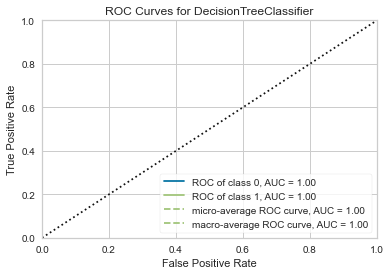

In [25]:
plot_model(tuned_dt, plot = 'auc')

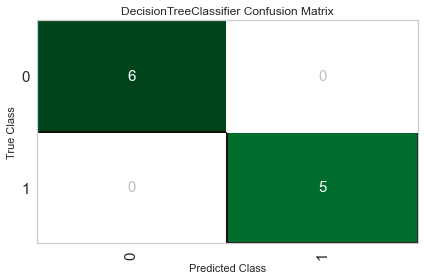

In [28]:
# performance depends on the size of samples, here due to the small size of test samples
plot_model(tuned_dt, plot = 'confusion_matrix')

In [29]:
predict_model(tuned_dt)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,身高,體重,性別,prediction_label,prediction_score
25,163.0,62.0,0,0,1.0000
26,167.0,79.0,1,1,0.6667
27,158.0,43.0,0,0,1.0000
28,170.0,47.0,1,1,1.0000
29,177.0,60.0,1,1,1.0000
...,...,...,...,...,...
31,168.0,48.0,0,0,0.6667
32,160.0,47.0,0,0,1.0000
33,183.0,66.0,1,1,1.0000
34,167.0,60.0,0,0,0.6667


In [30]:
final_dt = finalize_model(tuned_dt)

In [31]:
save_model(final_dt,'2022_12_8')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=/var/folders/xb/s7vwrt4153xbxzr8hc8tbdtr0000gn/T/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None, include=['身高', '體重'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=...
                  TransformerWrapper(exclude=[], include=None,
                                     transformer=VarianceThreshold(threshold=0))),
                 ('actual_estimator',
                  DecisionTreeClas

In [40]:
#final_dt.predict([[150],[40]])
#input_data=data[-3:] 
predict_model(tuned_dt,data=input_data)

,身高,體重,prediction_label,prediction_score
0,160.0,50.0,0,1.0


In [41]:
tuned_dt.predict([[160,50]])

array([0], dtype=int8)

In [42]:
input_data=pd.DataFrame(data={'身高':[160],'體重':[50]}) 
input_data

,身高,體重
0,160,50


In [43]:
predict_model(tuned_dt,data=input_data)['prediction_label']
#predict_model(tuned_dt,data=input_data)['prediction_label'][0]

0    0
Name: prediction_label, dtype: int64

In [44]:
tuned_dt.predict([[160,50]])

array([0], dtype=int8)

In [49]:
import numpy as np
sample=[160,50]
sample_list=np.array(sample).reshape(1, -1)

In [50]:
tuned_dt.predict(sample_list)

array([0], dtype=int8)

In [51]:
sample_list

array([[160,  50]])

In [59]:
list(input_data.iloc[0,:])

[160, 50]

In [61]:
tuned_dt.predict(sample_list)

array([0], dtype=int8)